In [1]:
!pip install tensorflow numpy pandas seaborn ucimlrepo

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping
from ucimlrepo import fetch_ucirepo

---

# Dataset

In [3]:
# fetch dataset
individual_household_electric_power_consumption = fetch_ucirepo(id=235)

# data (as pandas dataframes)
data = individual_household_electric_power_consumption.data.features

# metadata
print(individual_household_electric_power_consumption.metadata)

# variable information
print(individual_household_electric_power_consumption.variables)

{'uci_id': 235, 'name': 'Individual Household Electric Power Consumption', 'repository_url': 'https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption', 'data_url': 'https://archive.ics.uci.edu/static/public/235/data.csv', 'abstract': 'Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.', 'area': 'Physics and Chemistry', 'tasks': ['Regression', 'Clustering'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 2075259, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2006, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C58K54', 'creators': ['Georges Hebrail', 'Alice Berard'], 'intro_paper': None, 'additional_info': {'summary': 'This archiv

c:\Users\12ped\anaconda3\envs\biopotenciais\Lib\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [4]:
data.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


In [5]:
data['datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S')

data = data.set_index('datetime').sort_index()

data.drop(['Date', 'Time'], axis=1, inplace=True)
data = data[data['Global_active_power'] != '?']

In [6]:
datetimes = data.index.to_numpy()
gap = data['Global_active_power'].to_numpy().astype(float)

### Plotting data

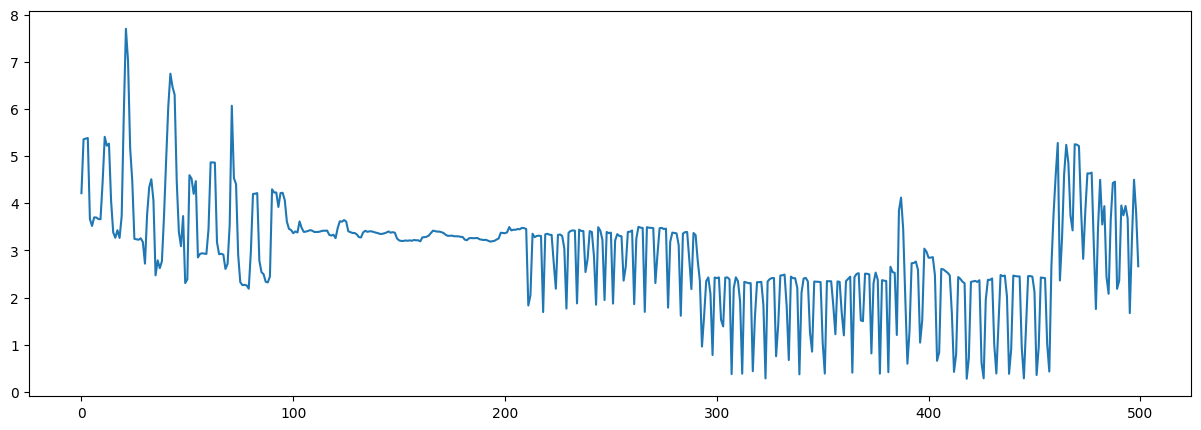

In [7]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(gap[:500])

---

# Neural Network

In [11]:
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True,
)

Epoch 1/50
1139/1139 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.2560 - val_loss: 0.1182
Epoch 2/50
1139/1139 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.1210 - val_loss: 0.0867
Epoch 3/50
1139/1139 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0978 - val_loss: 0.0822
Epoch 4/50
1139/1139 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.0933 - val_loss: 0.0815
Epoch 5/50
1139/1139 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.0902 - val_loss: 0.0884
Epoch 6/50
1139/1139 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0891 - val_loss: 0.0930
Epoch 7/50
1139/1139 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0874 - val_loss: 0.0776
Epoch 8/50
1139/1139 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0831 - val_loss: 0.0785
Epoch 9/50
1139/1139 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0854 - val_loss: 0.0783
Epoch 10/50
1139/1139 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0810 - val_loss: 0.0831
Epoch 11/50
1139/1139 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0821 - val_loss: 0.0778
Epoch 12/50
1139/1139 ━━━━━

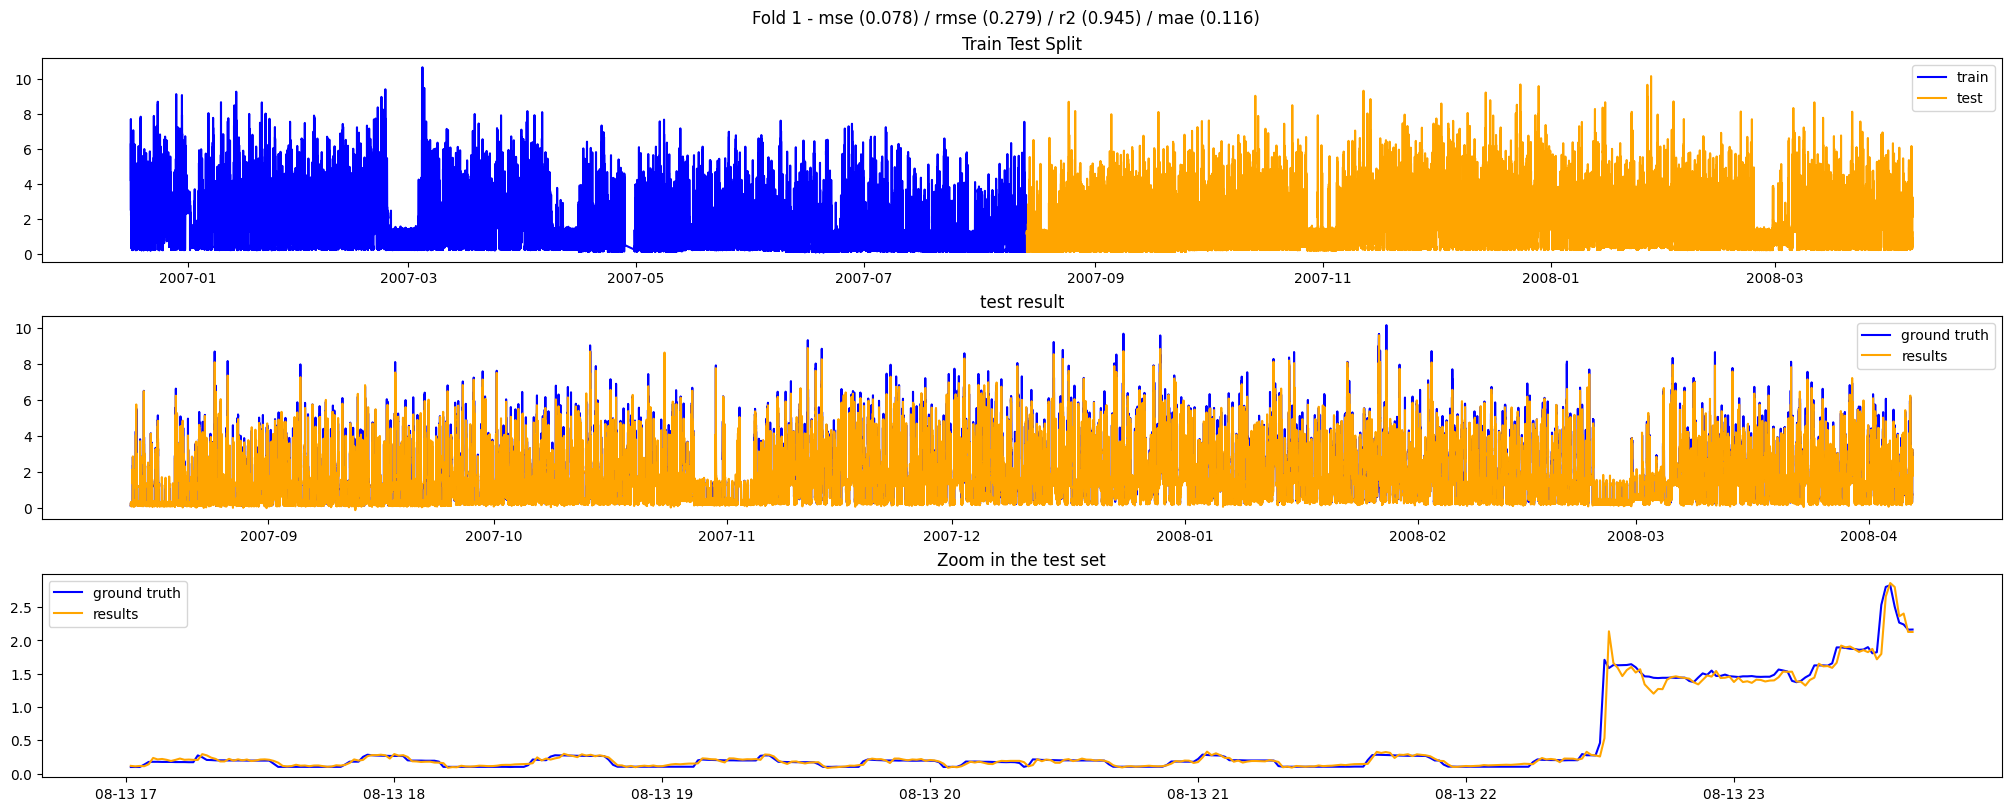

Epoch 1/50


c:\Users\12ped\anaconda3\envs\biopotenciais\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2277/2277 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - loss: 0.1756 - val_loss: 0.0749
Epoch 2/50
2277/2277 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - loss: 0.0915 - val_loss: 0.0674
Epoch 3/50
2277/2277 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - loss: 0.0857 - val_loss: 0.0717
Epoch 4/50
2277/2277 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - loss: 0.0840 - val_loss: 0.0647
Epoch 5/50
2277/2277 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - loss: 0.0813 - val_loss: 0.0672
Epoch 6/50
2277/2277 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 0.0804 - val_loss: 0.0650
Epoch 7/50
2277/2277 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - loss: 0.0793 - val_loss: 0.0636
Epoch 8/50
2277/2277 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - loss: 0.0772 - val_loss: 0.0652
Epoch 9/50
2277/2277 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - loss: 0.0775 - val_loss: 0.0620
Epoch 10/50
2277/2277 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - loss: 0.0763 - val_loss: 0.0620
Epoch 11/50
2277/2277 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - loss: 0.0757 - val_loss: 0.0661
Epoch 12/50
2277/2277 ━━━━━━━━

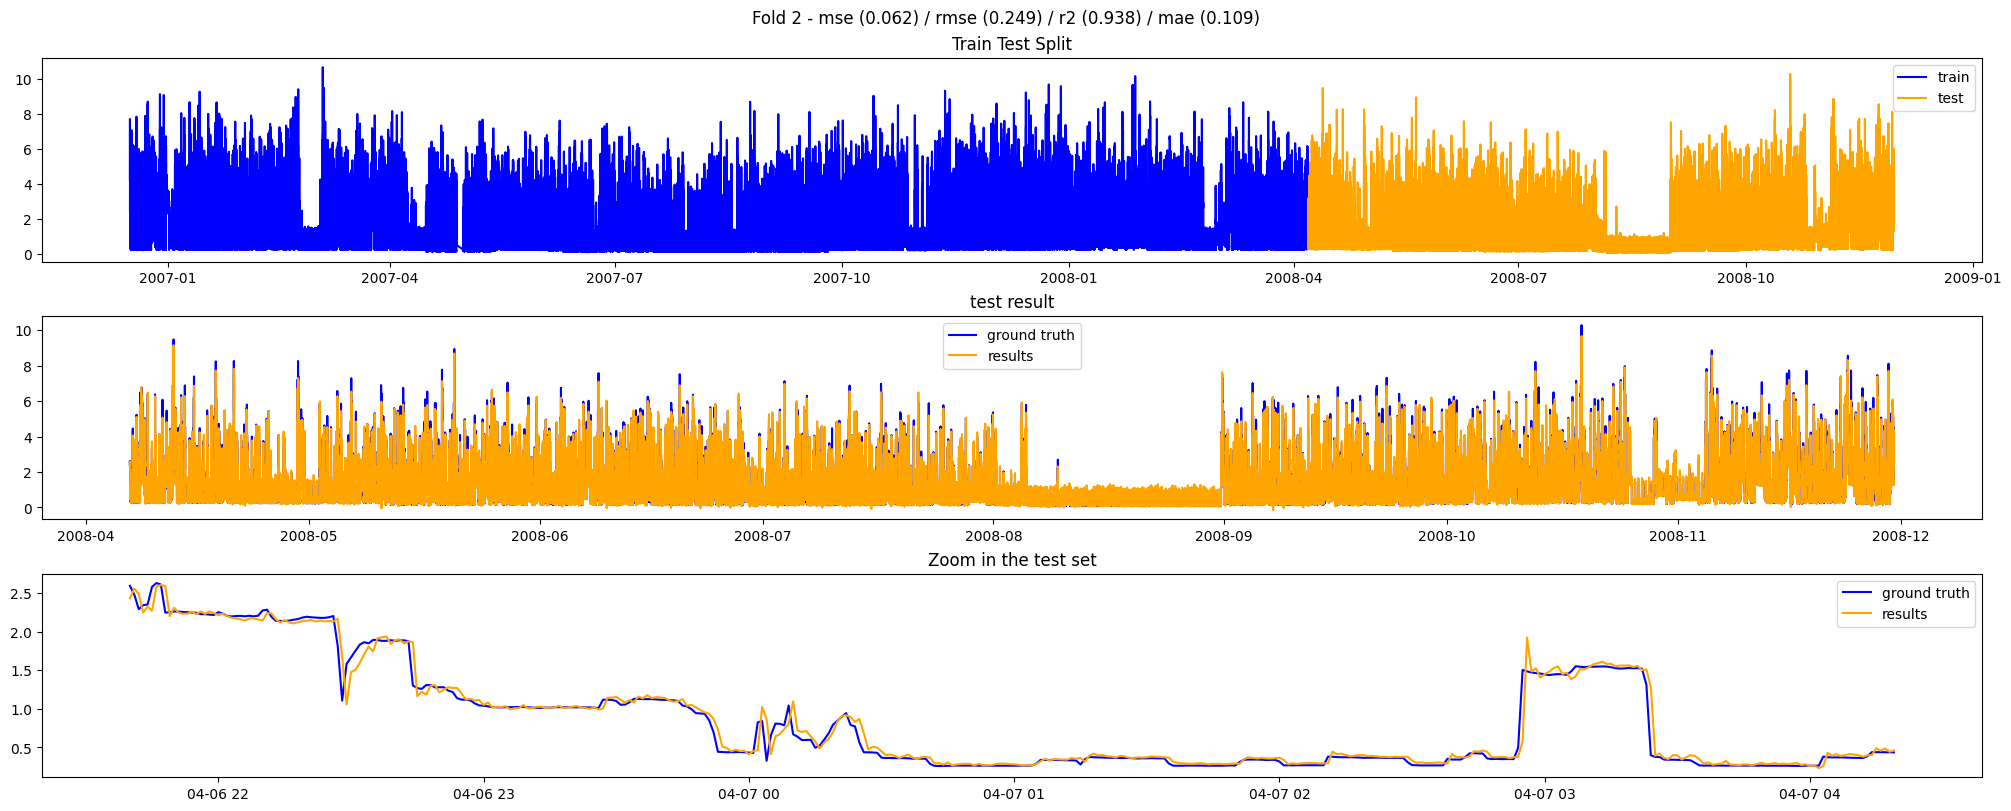

c:\Users\12ped\anaconda3\envs\biopotenciais\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
3416/3416 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - loss: 0.1581 - val_loss: 0.0660
Epoch 2/50
3416/3416 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - loss: 0.0814 - val_loss: 0.0653
Epoch 3/50
3416/3416 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - loss: 0.0789 - val_loss: 0.0625
Epoch 4/50
3416/3416 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - loss: 0.0769 - val_loss: 0.0642
Epoch 5/50
3416/3416 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - loss: 0.0748 - val_loss: 0.0601
Epoch 6/50
3416/3416 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - loss: 0.0732 - val_loss: 0.0597
Epoch 7/50
3416/3416 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - loss: 0.0729 - val_loss: 0.0596
Epoch 8/50
3416/3416 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - loss: 0.0717 - val_loss: 0.0633
Epoch 9/50
3416/3416 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - loss: 0.0716 - val_loss: 0.0589
Epoch 10/50
3416/3416 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - loss: 0.0700 - val_loss: 0.0606
Epoch 11/50
3416/3416 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - loss: 0.0700 - val_loss: 0.0599
Epoch 12/50
3416/34

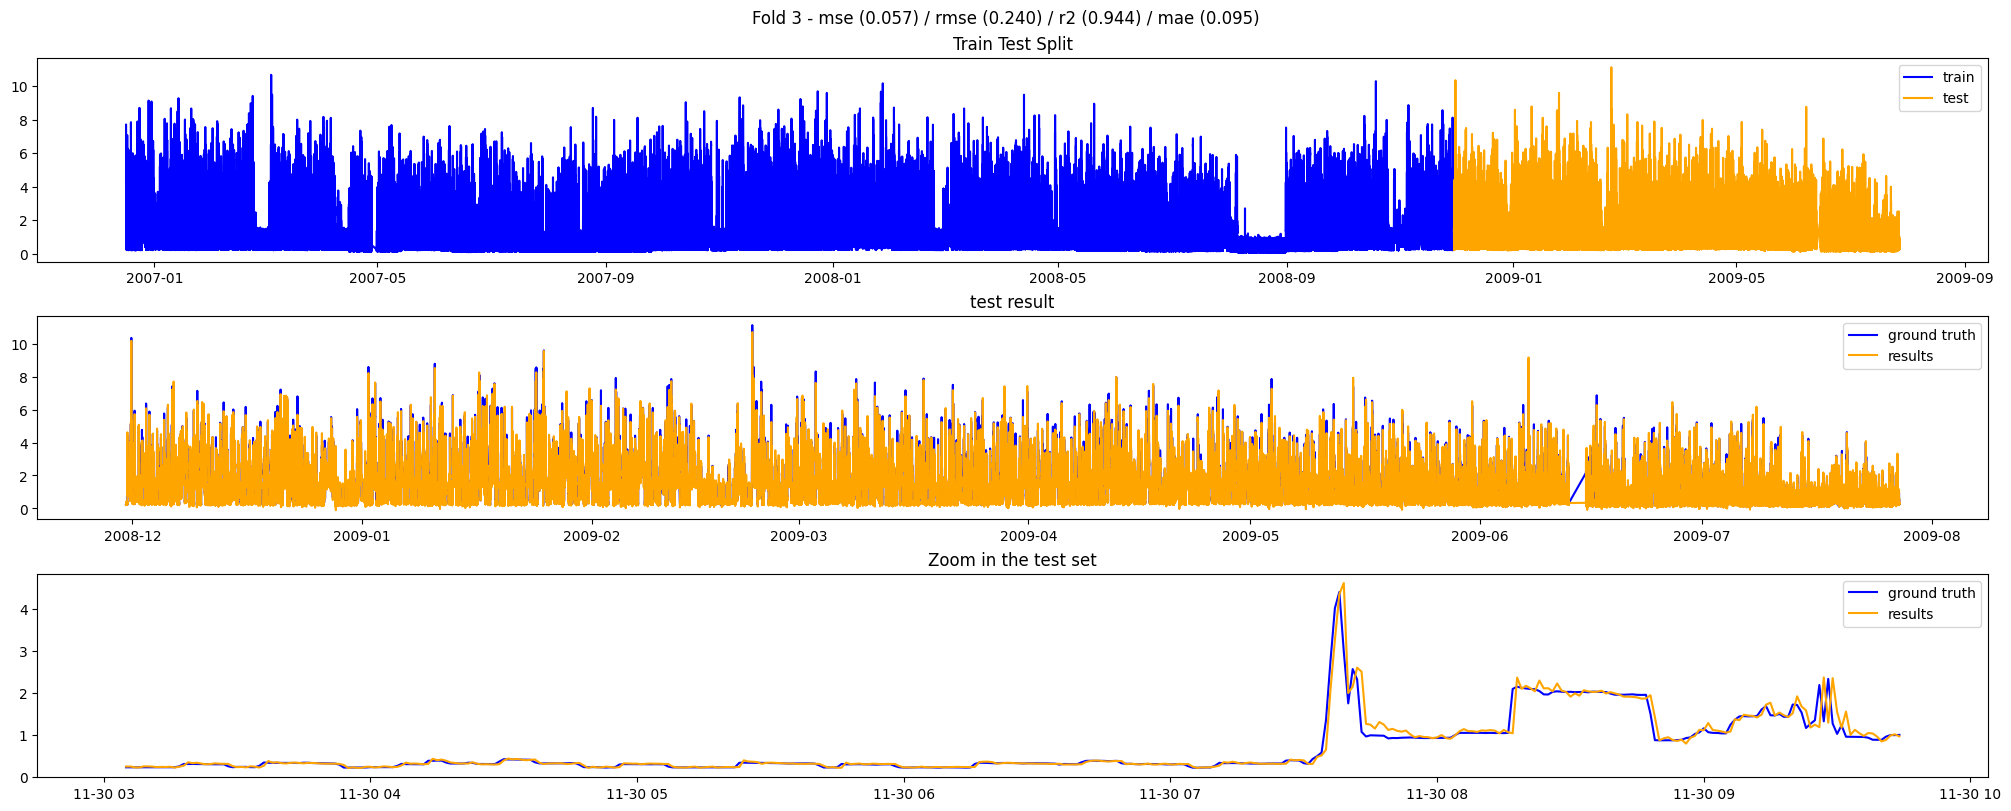

c:\Users\12ped\anaconda3\envs\biopotenciais\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
4554/4554 ━━━━━━━━━━━━━━━━━━━━ 32s 7ms/step - loss: 0.1340 - val_loss: 0.0658
Epoch 2/50
4554/4554 ━━━━━━━━━━━━━━━━━━━━ 31s 7ms/step - loss: 0.0760 - val_loss: 0.0620
Epoch 3/50
4554/4554 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - loss: 0.0720 - val_loss: 0.0585
Epoch 4/50
4554/4554 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - loss: 0.0704 - val_loss: 0.0596
Epoch 5/50
4554/4554 ━━━━━━━━━━━━━━━━━━━━ 28s 6ms/step - loss: 0.0696 - val_loss: 0.0567
Epoch 6/50
4554/4554 ━━━━━━━━━━━━━━━━━━━━ 28s 6ms/step - loss: 0.0680 - val_loss: 0.0661
Epoch 7/50
4554/4554 ━━━━━━━━━━━━━━━━━━━━ 28s 6ms/step - loss: 0.0678 - val_loss: 0.0578
Epoch 8/50
4554/4554 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - loss: 0.0674 - val_loss: 0.0589
Epoch 9/50
4554/4554 ━━━━━━━━━━━━━━━━━━━━ 30s 7ms/step - loss: 0.0665 - val_loss: 0.0557
Epoch 10/50
4554/4554 ━━━━━━━━━━━━━━━━━━━━ 28s 6ms/step - loss: 0.0659 - val_loss: 0.0563
Epoch 11/50
4554/4554 ━━━━━━━━━━━━━━━━━━━━ 28s 6ms/step - loss: 0.0652 - val_loss: 0.0558
Epoch 12/50
4554/45

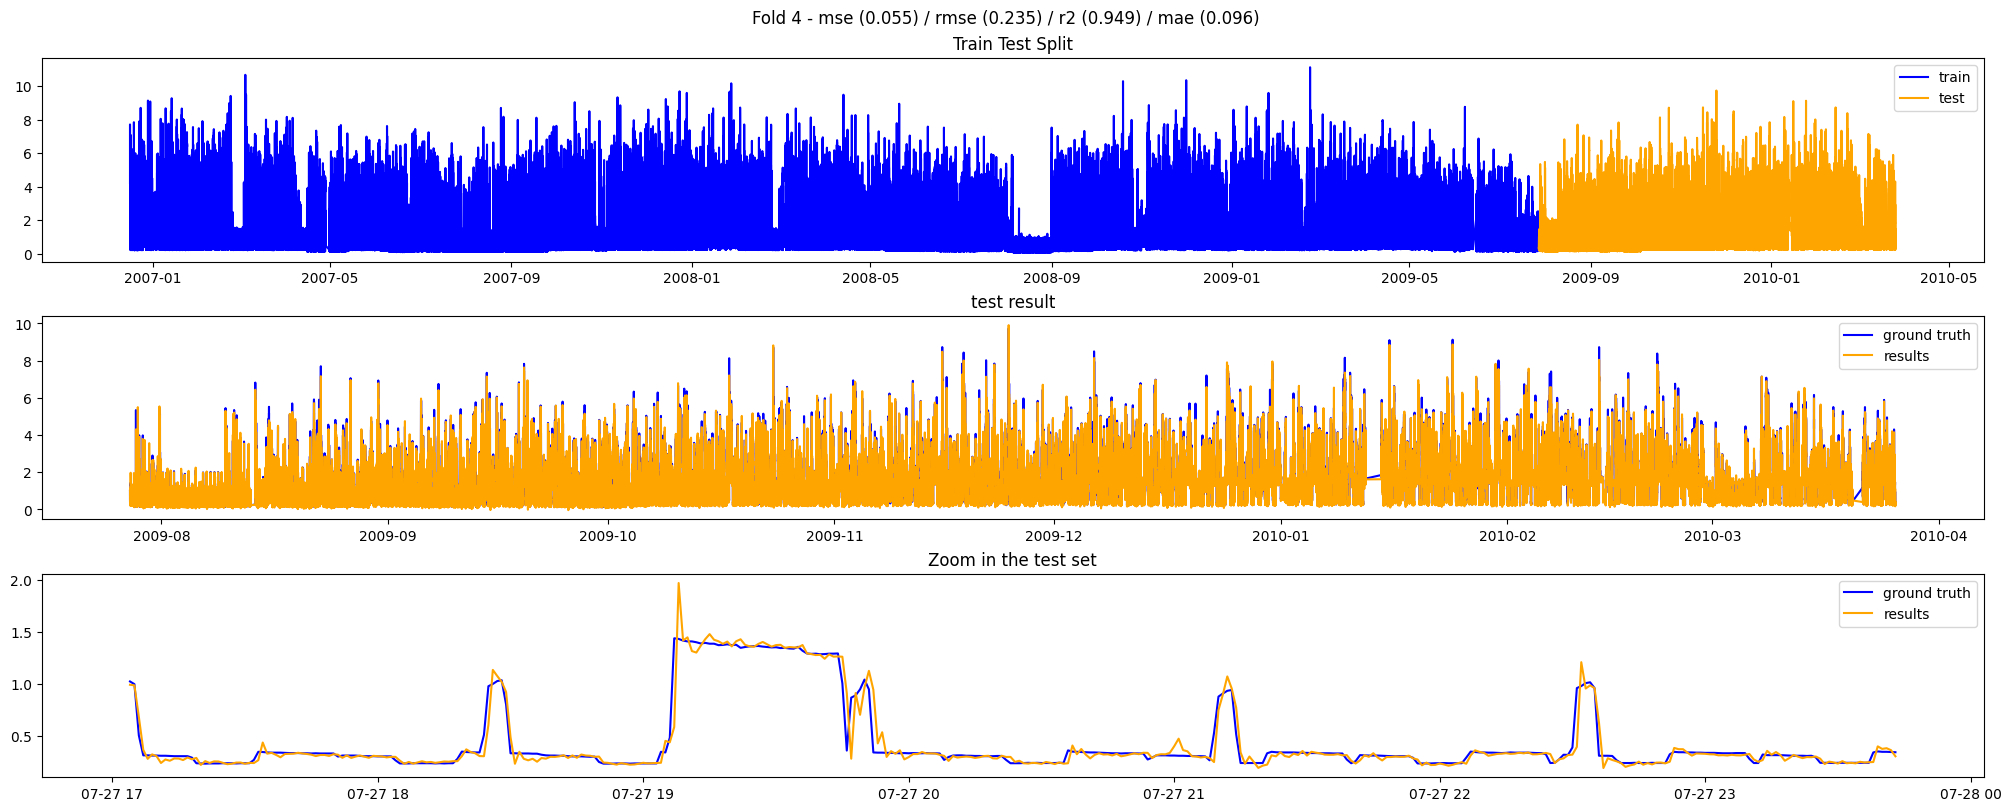

c:\Users\12ped\anaconda3\envs\biopotenciais\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
5693/5693 ━━━━━━━━━━━━━━━━━━━━ 38s 7ms/step - loss: 0.1262 - val_loss: 0.0550
Epoch 2/50
5693/5693 ━━━━━━━━━━━━━━━━━━━━ 37s 6ms/step - loss: 0.0724 - val_loss: 0.0452
Epoch 3/50
5693/5693 ━━━━━━━━━━━━━━━━━━━━ 35s 6ms/step - loss: 0.0695 - val_loss: 0.0470
Epoch 4/50
5693/5693 ━━━━━━━━━━━━━━━━━━━━ 37s 6ms/step - loss: 0.0680 - val_loss: 0.0444
Epoch 5/50
5693/5693 ━━━━━━━━━━━━━━━━━━━━ 37s 6ms/step - loss: 0.0669 - val_loss: 0.0450
Epoch 6/50
5693/5693 ━━━━━━━━━━━━━━━━━━━━ 37s 7ms/step - loss: 0.0655 - val_loss: 0.0434
Epoch 7/50
5693/5693 ━━━━━━━━━━━━━━━━━━━━ 38s 7ms/step - loss: 0.0646 - val_loss: 0.0460
Epoch 8/50
5693/5693 ━━━━━━━━━━━━━━━━━━━━ 35s 6ms/step - loss: 0.0639 - val_loss: 0.0439
Epoch 9/50
5693/5693 ━━━━━━━━━━━━━━━━━━━━ 35s 6ms/step - loss: 0.0636 - val_loss: 0.0435
Epoch 10/50
5693/5693 ━━━━━━━━━━━━━━━━━━━━ 35s 6ms/step - loss: 0.0634 - val_loss: 0.0438
Epoch 11/50
5693/5693 ━━━━━━━━━━━━━━━━━━━━ 35s 6ms/step - loss: 0.0631 - val_loss: 0.0435
10671/10671 ━━━━━━━

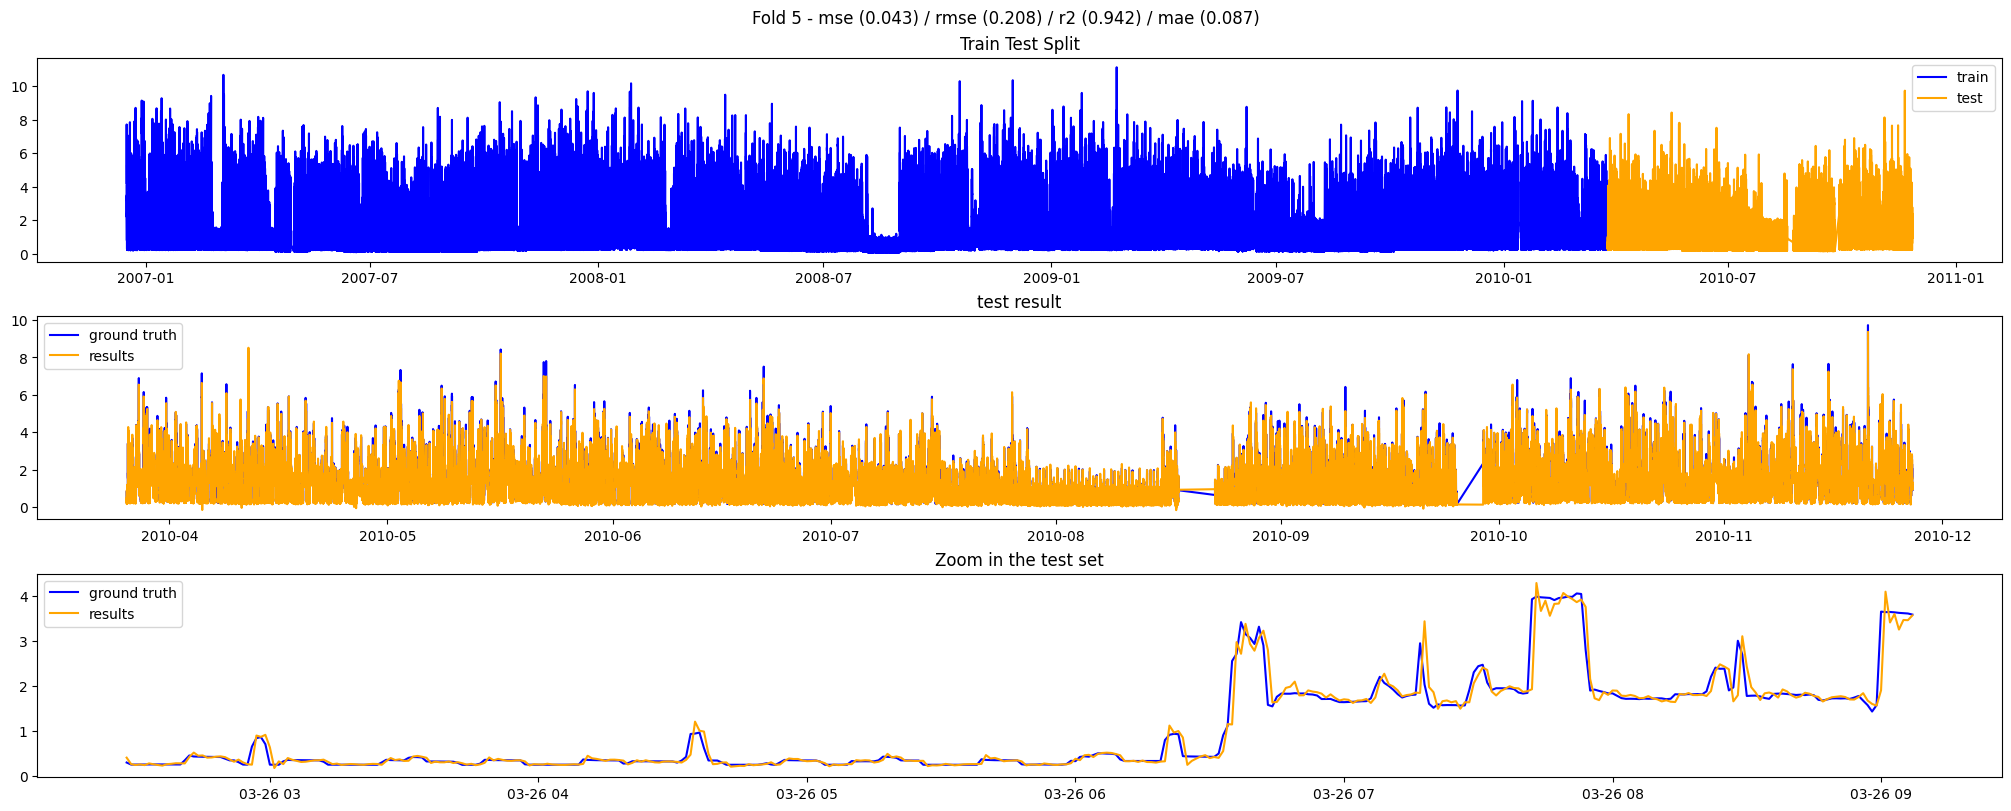

In [12]:
def create_sliding_window_data(data, window_size):
    X = []
    y = []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])  # The window of input data
        y.append(data[i + window_size])    # The next value as the target

    return np.array(X), np.array(y)

n_splits = 5
window_size = 100

mae = []
r2 = []
rmse = []
mse = []

tscv = TimeSeriesSplit(n_splits=n_splits)
for i, (train_index, test_index) in enumerate(tscv.split(gap)):

    gap_train, gap_test = gap[train_index], gap[test_index]
    
    X_train, y_train = create_sliding_window_data(gap_train, window_size)
    X_test, y_test = create_sliding_window_data(gap_test, window_size)

    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(window_size, 1)))
    model.add(MaxPooling1D(pool_size=2, strides=2, padding='valid'))
    model.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2, strides=2, padding='valid'))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    history = model.fit(
        x=X_train,
        y=y_train,
        batch_size=300,
        epochs=50,
        shuffle=True,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping],
    )

    results = model.predict(X_test).reshape(-1)

    mae.append(mean_absolute_error(y_test, results))
    r2.append(r2_score(y_test, results))
    rmse.append(root_mean_squared_error(y_test, results))
    mse.append(mean_squared_error(y_test, results))

    fig, axs = plt.subplots(ncols=1, nrows=3, constrained_layout=True, figsize=(20,8))
    fig.suptitle(f'Fold {i+1} - mse ({mse[-1]:.3f}) / rmse ({rmse[-1]:.3f}) / r2 ({r2[-1]:.3f}) / mae ({mae[-1]:.3f})')
    axs[0].set_title('Train Test Split')
    axs[0].plot(datetimes[train_index], gap_train, c='blue', label='train')
    axs[0].plot(datetimes[test_index], gap_test, c='orange', label='test')
    axs[0].legend()
    axs[1].set_title(f'test result')
    axs[1].plot(datetimes[test_index][window_size:], y_test, c='blue', label='ground truth')
    axs[1].plot(datetimes[test_index][window_size:], results, c='orange', label='results')
    axs[1].legend()
    axs[2].set_title(f'Zoom in the test set')
    axs[2].plot(datetimes[test_index][window_size:window_size+400], y_test[:400], c='blue', label='ground truth')
    axs[2].plot(datetimes[test_index][window_size:window_size+400], results[:400], c='orange', label='results')
    axs[2].legend()
    plt.show()

In [13]:
print(
    f'RMSE: {np.mean(rmse)} ± {np.std(rmse)} \n'
    f'MSE: {np.mean(mse)} ± {np.std(mse)} \n'
    f'r2: {np.mean(r2)} ± {np.std(r2)} \n'
    f'MAE: {np.mean(mae)} ± {np.std(mae)} \n'
)

RMSE: 0.24214065294148107 ± 0.022687381133356794 
MSE: 0.05914681306961698 ± 0.011083232835757238 
r2: 0.9436560709439442 ± 0.003598755851717139 
MAE: 0.1007269724337044 ± 0.010598304954714288 

